<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220314%EB%B6%84%EB%A5%98%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 핸즈온 머신러닝 03.분류 연습문제

> ## 3.8.1 97%의 정확도 (힌트: KNeighborsClassifier의 weights, n_neighbors)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 4, weights = "distance") # distance:x 데이터를 분류를 할 때 k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 가중치를 설정
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  34.7s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  31.7s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  31.3s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  32.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  31.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  30.9s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  31.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  30.9s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  30.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  31.1s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  35.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

0.9714

> ## 3.8.2 데이터 증식

In [ ]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

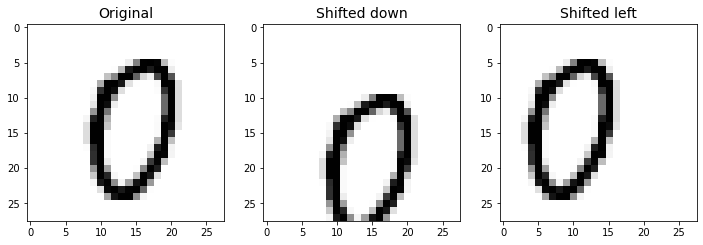

In [ ]:
image = X_train.loc[1000].values
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)
shifted_image_up = shift_image(image, 0, -5)
shifted_image_right = shift_image(image, 5, 0)

plt.figure(figsize=(12,5))

plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.show()

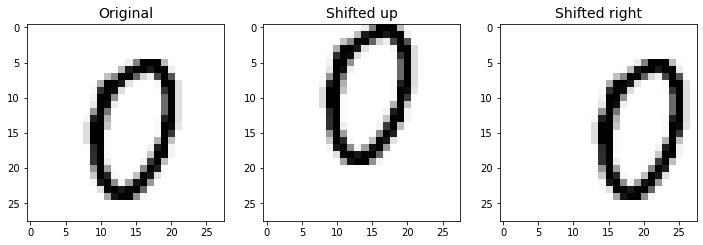

In [ ]:
image = X_train.loc[1000].values

plt.figure(figsize=(12,5))

plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(132)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(133)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")

In [ ]:
import numpy as np

X_train_aug = [image for image in X_train.values]
y_train_aug = [label for label in y_train.values]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train.values, y_train.values):
        X_train_aug.append(shift_image(image, dx, dy))
        y_train_aug.append(label)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9763